In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
l = np.linspace(-4,4,21) # 1D line
x,y = np.meshgrid(l,l)   # make a 2D mesh of points
z = x+1j*y               # 1j is python complex unit

def plot(F,W,z):
    # Plotting contours of the imaginary part of the
    plt.contour(np.real(z),np.imag(z),np.imag(F),25)
    plt.quiver(np.real(z),np.imag(z),np.real(W),-np.imag(W))
    plt.axis('equal')
    plt.show()

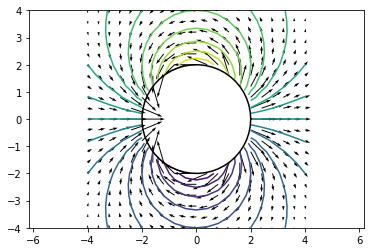

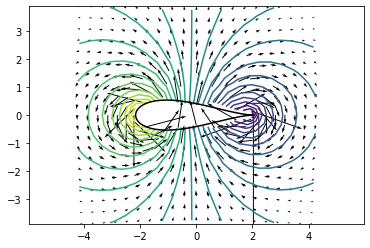

In [24]:

# dipole flow
a = 2
z_circ = a*np.exp(1j*np.linspace(0,2*np.pi))
z_plane = np.ma.array(z,mask=np.abs(z)<0.9*2)
F = -a**2/z_plane; W = a**2/z_plane**2

# Plot
#plt.figure(figsize=(3,3),dpi=300)
plt.plot(np.real(z_circ),np.imag(z_circ),'k',zorder=2)
plot(F,W,z_plane)

# zeta-plane
zeta_0 = -0.25; a = 1-zeta_0
zeta_circ = a*np.exp(1j*np.linspace(0,2*np.pi))+zeta_0
zeta = np.ma.array(z,mask=np.abs(z-zeta_0)<0.9*a)
F = -1j/zeta-1j*a**2/(zeta-zeta_0)  #dipole -1j:imaginary last:modification
W = 1j*a**2/(zeta-zeta_0)**2+1j/zeta**2

# Map to z-plane
z_ellipse = zeta_circ+1/zeta_circ
z_plane = zeta+1/zeta


# Plot
# plt.figure(figsize=(3,3),dpi=300)
plt.plot(np.real(z_ellipse),np.imag(z_ellipse),'k',zorder=2)
plot(F,W/(1-zeta**(-2)),z_plane)


$$ m_{ii} = \frac{-i\rho}2\oint \tilde\Phi_i d\tilde\Phi_i^* $$

In [5]:
# contour integral
def cont_int(F):
    return np.real(-0.5j*np.trapz(F*np.conj(np.gradient(F))))

def added_mass(zeta_0=-0.25, a=None, dtheta = 0.01):
    if a==None: a = np.abs(1-zeta_0).item()

    # contour
    zeta = a*np.exp(1j*np.arange(0,2*np.pi,dtheta))+zeta_0
    
    # mapped contour
    z = zeta+1/zeta
    c = max(np.real(z))-min(np.real(z))
    t = max(np.imag(z))-min(np.imag(z))
    A = -cont_int(z)

    # added mass
    Fx = a**2/(zeta-zeta_0)-1/zeta
    mxx = cont_int(Fx)
    Fy = -1j*a**2/(zeta-zeta_0)-1j/zeta
    myy = cont_int(Fy)
    return c,t,A,mxx,myy

# Validate results against ellipse
s = "code={:.3g}, true={:.3g}"
for a in [2,4]:
    c,t,A,mxx,myy = added_mass(zeta_0=0,a=a)
    bx,by = a+1/a,a-1/a
    trueA = np.pi*bx*by
    truex = np.pi*by**2
    truey = np.pi*bx**2
    print(a)
    print('c:'+s.format(c,2*bx))
    print('t:'+s.format(t,2*by))
    print('A:'+s.format(A,trueA))
    print('mxx:'+s.format(mxx,truex))
    print('myy:'+s.format(myy,truey))

2
c:code=5, true=5
t:code=3, true=3
A:code=11.8, true=11.8
mxx:code=7.06, true=7.07
myy:code=19.6, true=19.6
4
c:code=8.5, true=8.5
t:code=7.5, true=7.5
A:code=50, true=50.1
mxx:code=44.2, true=44.2
myy:code=56.7, true=56.7


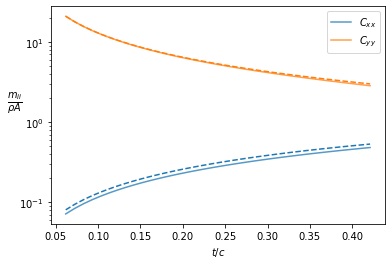

In [5]:
# circle shift parameter sweep
c,t,A,mxx,myy = np.array([added_mass(-b) for b in np.linspace(0.05,0.5)]).T

# plot
# plt.figure(figsize=(3,3),dpi=300)
plt.plot(t/c,mxx/A,label=r'$C_{xx}$',alpha=0.75)
plt.plot(t/c,np.pi*(t/2)**2/A,color='C0',ls='--')
plt.plot(t/c,myy/A,label=r'$C_{yy}$',alpha=0.75)
plt.plot(t/c,np.pi*(c/2)**2/A,color='C1',ls='--')
plt.yscale('log')
plt.xlabel('$t/c$')
plt.ylabel(r'$\frac{m_{ii}}{\rho A}$',rotation=0,size=14)
plt.legend()
plt.show()

In [6]:
from scipy.optimize import fsolve
def error(a,b,Cm,BoT):
    Cm_error = Cm-Cm_Lewis(a,b)
    BoT_error = BoT-BoT_Lewis(a,b)
    return (Cm_error,BoT_error)
def f(x):
    return error(a=x[0],b=x[1],Cm=0.9,BoT=4)
x0 = (0,0)
a,b = fsolve(f,x0)

IndentationError: expected an indented block (<ipython-input-6-70dd3cab71e4>, line 3)

NameError: name 'fsolve' is not defined